# Twitter-Sentiment-Analysis : EDA

> Objectives:     
-
    - Understand the structure , distribution, and challeges of the `twitter_raw_data` before building any models. 



In [5]:
# Add this block of the code to the top of every notebook file for 
# [ Maintenance, Fragility, Security & Stability also with Reproduciility ]

""" protects your source code from failure """

import sys 
import os 

# get the absolute path of the project root 
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# add it to sys.path if it's not already there 
if project_root not in sys.path: 
    sys.path.append(project_root) 

> #### Imports

In [7]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# import data module
from src.data.load_data import load_raw_data, sample_data_path

> ### Load_data :

In [10]:
df = load_raw_data(r"C:\Users\HP\OneDrive\Desktop\TSA-capstone\Twitter-Sentiment-Analysis-Capstone\data\raw\twitter-raw-data.csv")
df.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative
1,is upset that he can't update his Facebook by ...,negative
2,@Kenichan I dived many times for the ball. Man...,negative
3,my whole body feels itchy and like its on fire,negative
4,"@nationwideclass no, it's not behaving at all....",negative


> #### Shape & Info:

In [15]:
# check shape & info ( size, nulls, datatypes )
print('Shape : ', df.shape)
df.info()

Shape :  (1600000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1600000 non-null  object
 1   target  1600000 non-null  object
dtypes: object(2)
memory usage: 24.4+ MB


> #### Class Distribution:

In [16]:
# check class distribution
df['target'].value_counts(normalize=True)

target
negative    0.5
positive    0.5
Name: proportion, dtype: float64

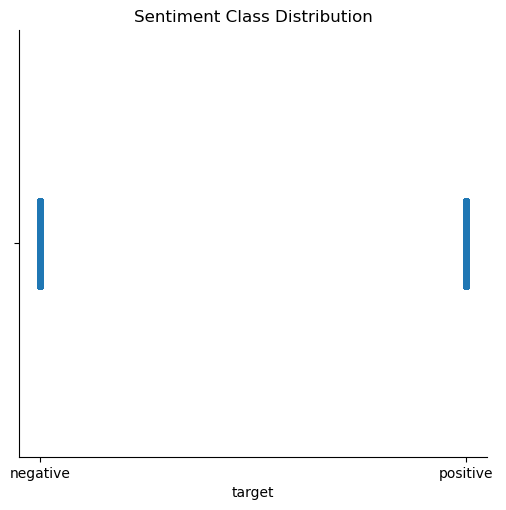

In [17]:
# check data imbalance 
sns.catplot(x='target', data=df)
plt.title("Sentiment Class Distribution")
plt.show()

- Shows the data is balanced hence in metrics ( F1 > Accuracy ).

> #### Text Length Analysis:

In [18]:
# Text Length Analysis 
df['text_len'] = df['text'].apply(len)
df['text_len'].describe()

count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01
min      6.000000e+00
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
max      3.740000e+02
Name: text_len, dtype: float64

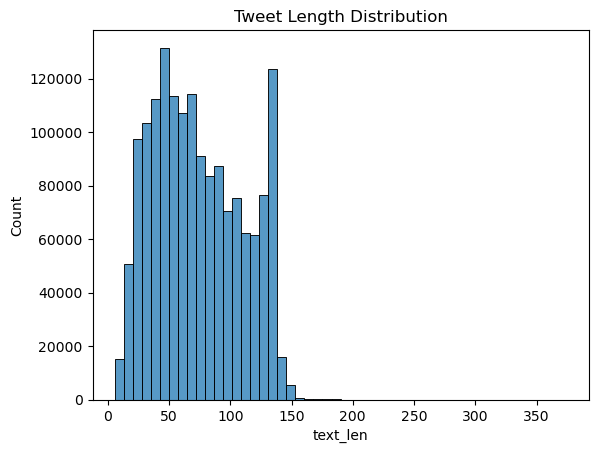

' shows typical tweets length'

In [23]:
sns.histplot(df['text_len'], bins=50)
plt.title("Tweet Length Distribution")
plt.show()

''' shows typical tweets length'''

> #### Sample Tweets :

In [31]:
df[df['target'] == 'positive']['text'].sample(5).tolist()
print(' \n')
df[df['target'] == 'negative']['text'].sample(5).tolist()

['I lost the list  Bad Bad.. And I donÂ´t find my book ... sad, sad..',
 "@wayner24 hey what time are you gonna be in toronto at tomorrow? i'm gonna be at eaton centre all day! ",
 '@halamazin LOOOL how could I forgetttt  Miss you 7addi walla',
 'wishing franklin the sausage dog didnt have to leave ',
 "@lulliecarole too bad i don't  but i'll tell you as soon as i got one! :p"]

> #### Understandings: Noise Inspections: 
Observations: 
- Tweets  [ @ ]        : mention usernames frequently 
- chat-words    : frequently used 
- pactuations   : more common 
- #hashtags     : present
- digits        : only dates

- Noise removal is necessary


` since the data is balanced we need the Balance Precision and Recall `
-       F1-score